In [15]:
import sys
sys.path.append('/home/zhw272/programming/pipeline_utility/in_development/Will')
from cell_extractor.CellDetector import MultiThresholdDetector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def string_to_prediction(string):
    if string.split('_')[1] == 'sure':
        return 2
    elif string.split('_')[1] == 'unsure':
        return 0
    elif string.split('_')[1] == 'null':
        return -2

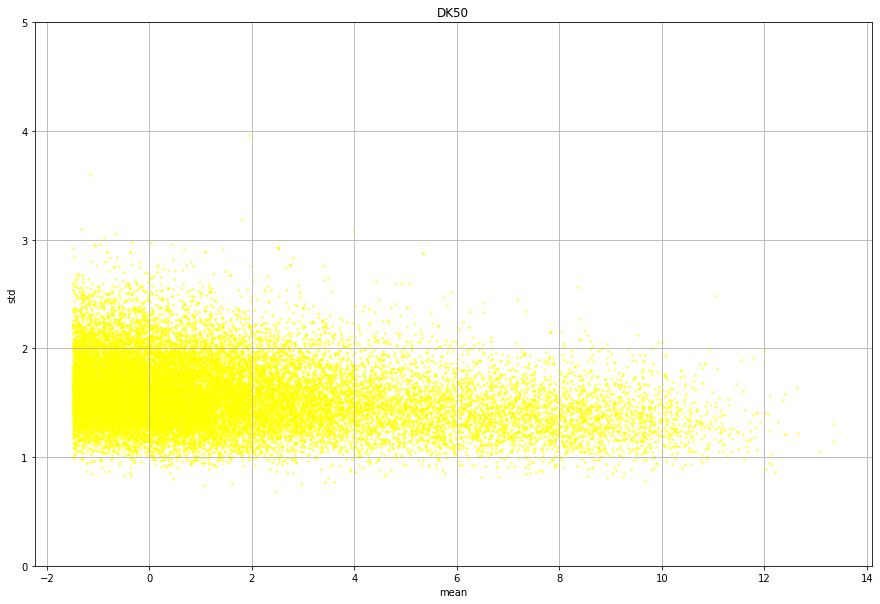

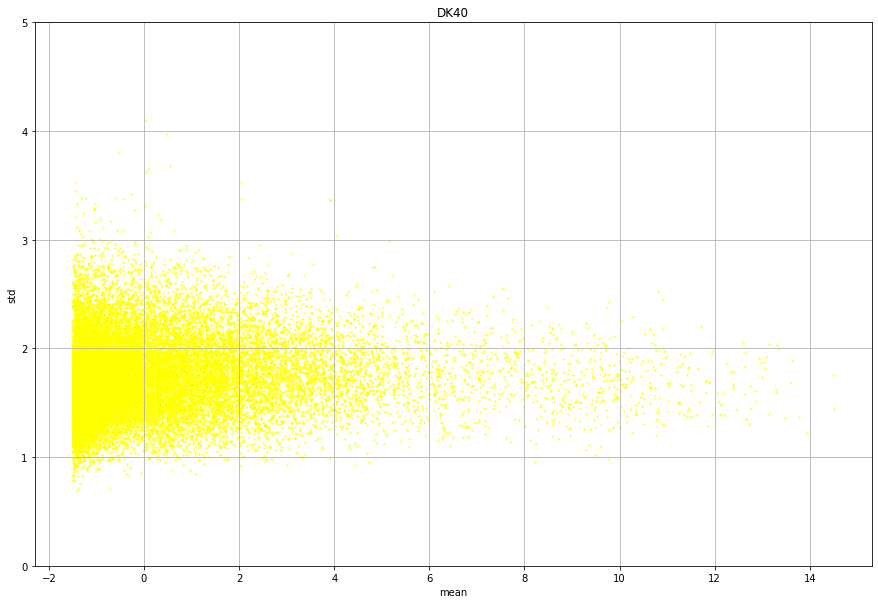

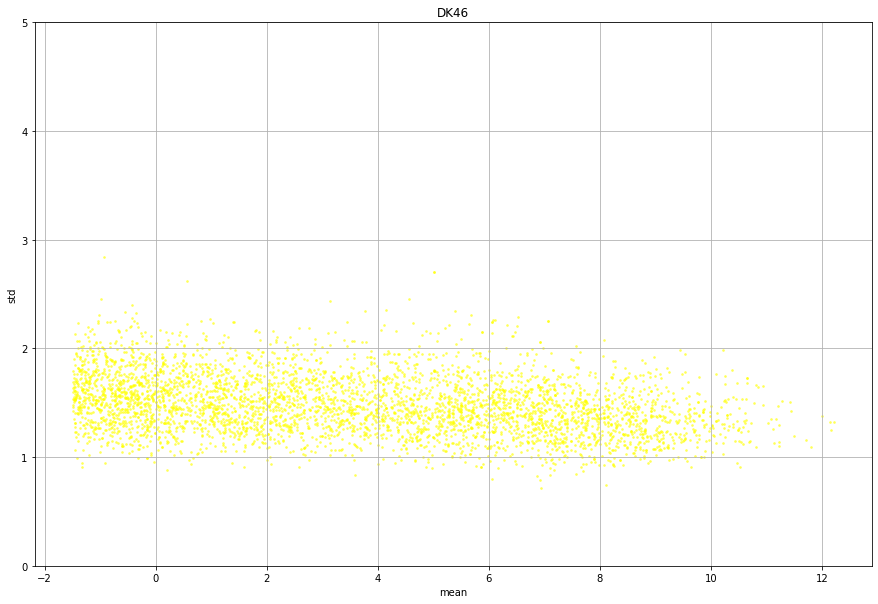

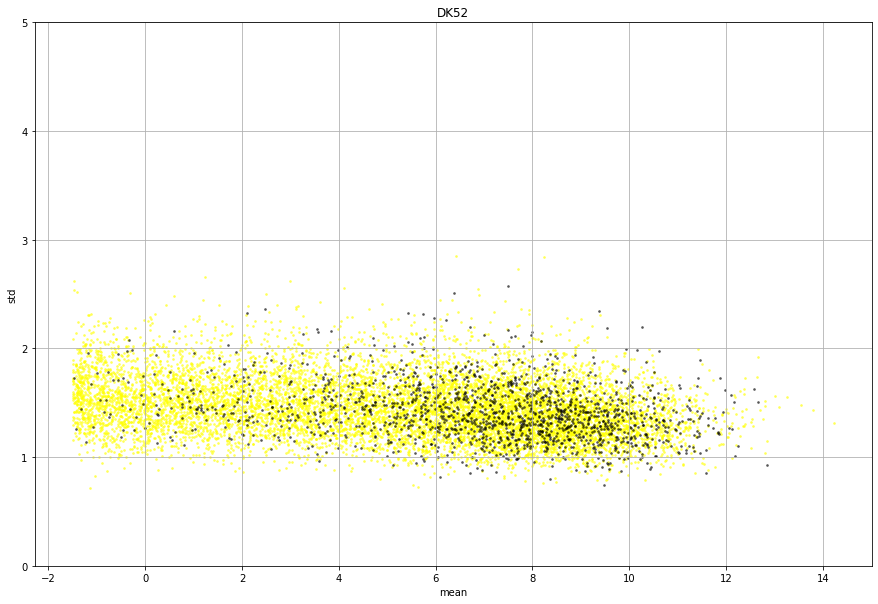

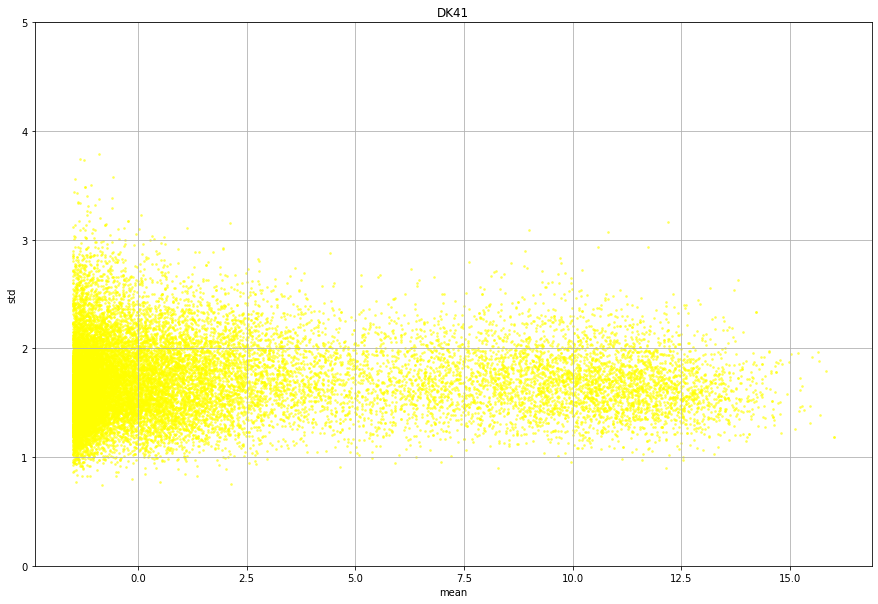

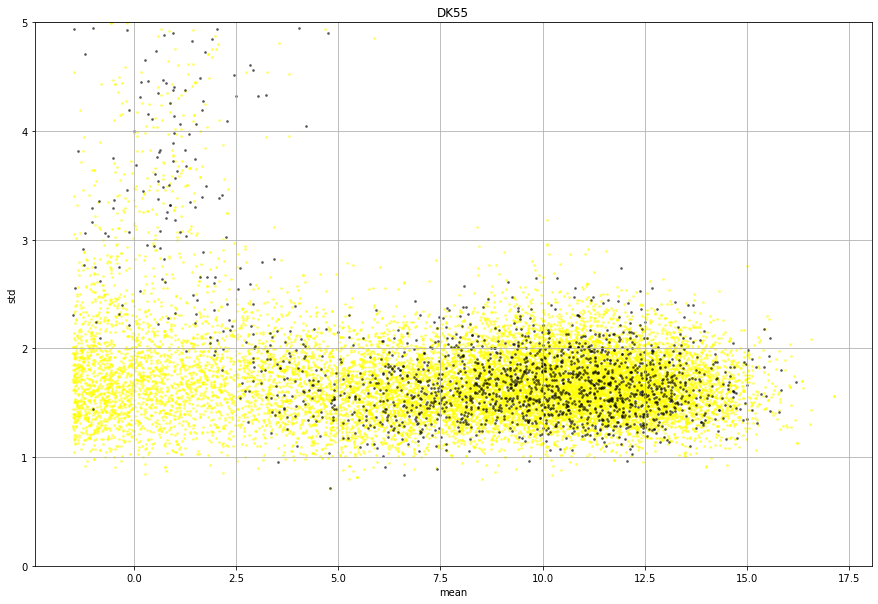

In [4]:
animals = ['DK50','DK40','DK46','DK52','DK41','DK55']
lower = 0
upper = 5
for animali in animals:
    detector = MultiThresholdDetector(animali,round = 2)
    detections = detector.load_detections()
    detections = detections[[string_to_prediction(i) != -2 for i in detections.name]]
    detector.detector.mean = detections['mean'].to_numpy()
    detector.detector.std = detections['std'].to_numpy()
    detector.detector.labels = detections['label'].to_numpy()
    detector.detector.predictions = [string_to_prediction(i) for i in detections.name]
    detector.detector.plot_score_scatter([],color1 = 'black',color2 = 'yellow',lower_lim= lower,upper_lim= upper,title = animali,alpha1 = 0.5,alpha2 = 0.5)

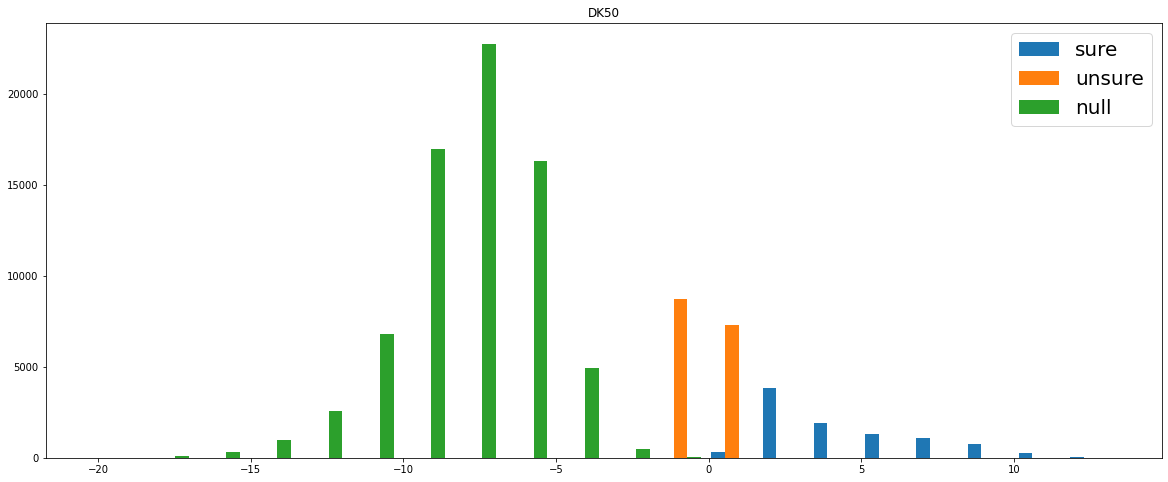

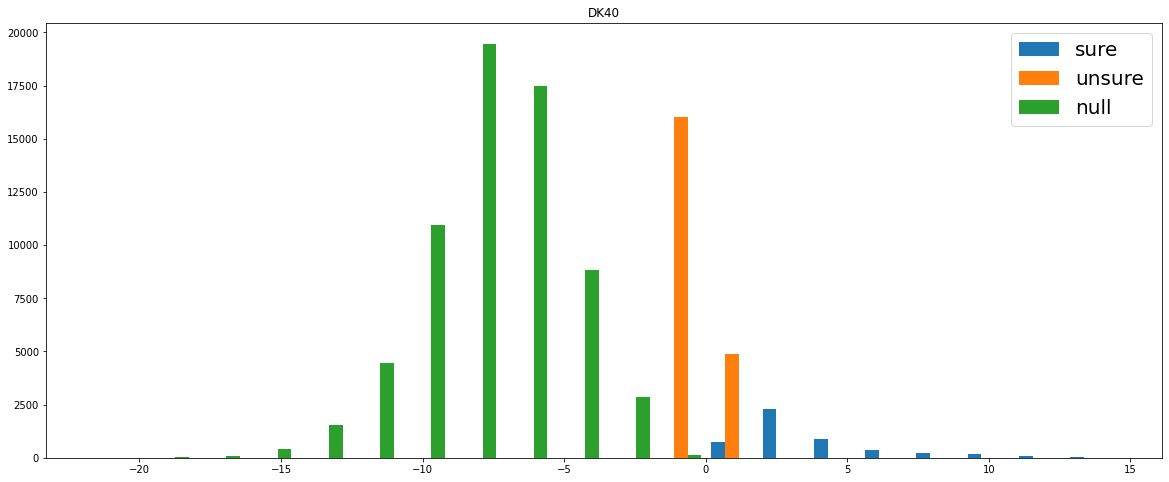

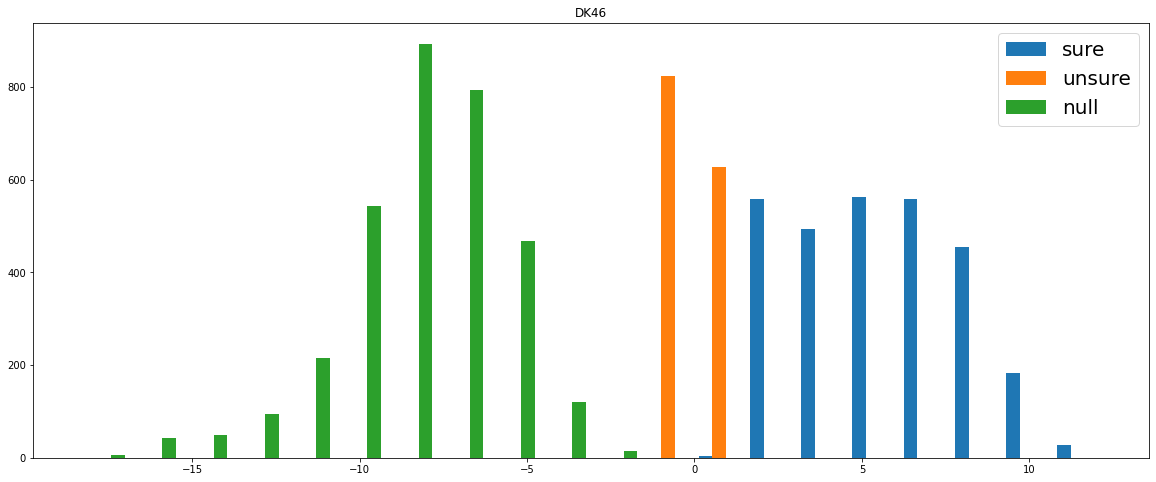

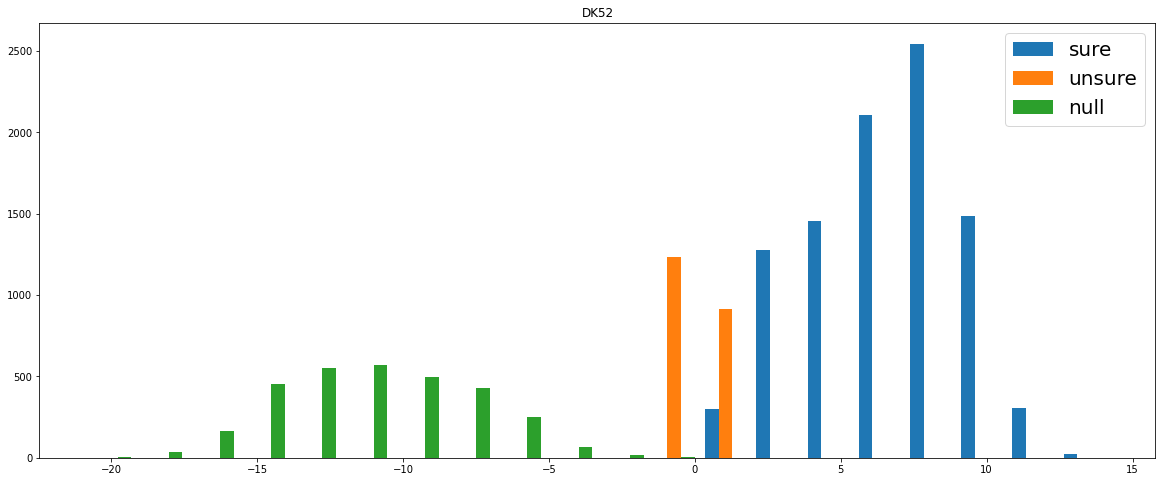

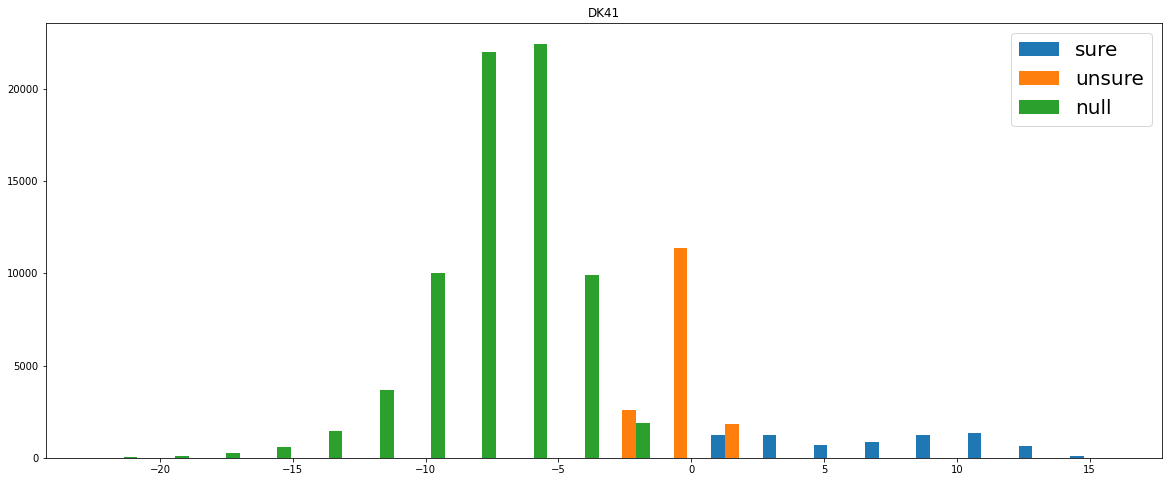

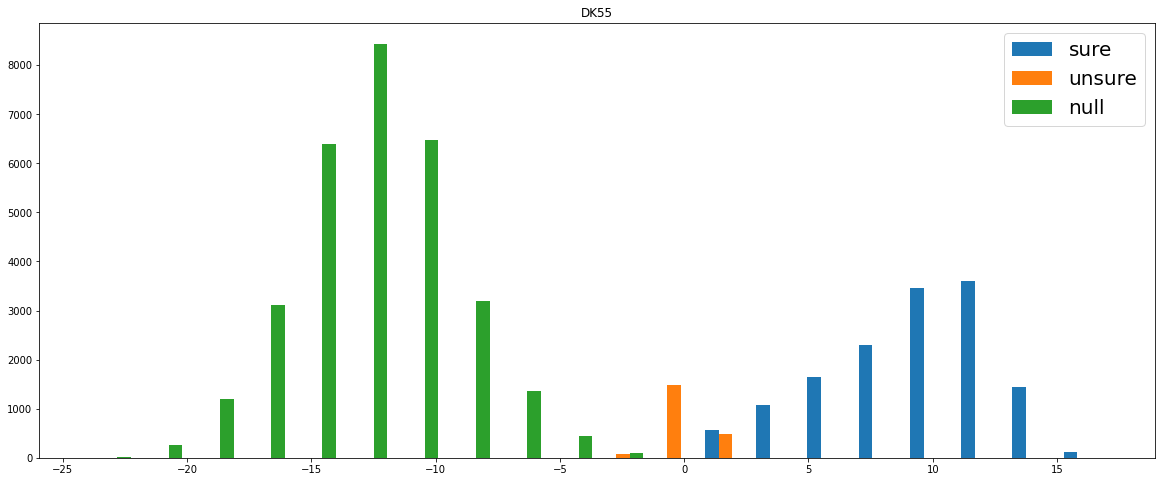

In [26]:
animals = ['DK50','DK40','DK46','DK52','DK41','DK55']
lower = 0
upper = 5
for animali in animals:
    detector = MultiThresholdDetector(animali,round = 2)
    detections = detector.load_detections()
    nulls = detections[[string_to_prediction(i) == -2 for i in detections.name]]
    sure = detections[[string_to_prediction(i) == 2 for i in detections.name]]
    unsure = detections[[string_to_prediction(i) == 0 for i in detections.name]]
    plt.figure(figsize = [20,8])
    plt.title(animali)
    plt.hist([sure['mean'],unsure['mean'],nulls['mean']],bins = 20);
    plt.legend(['sure','unsure','null'], prop={'size': 20})

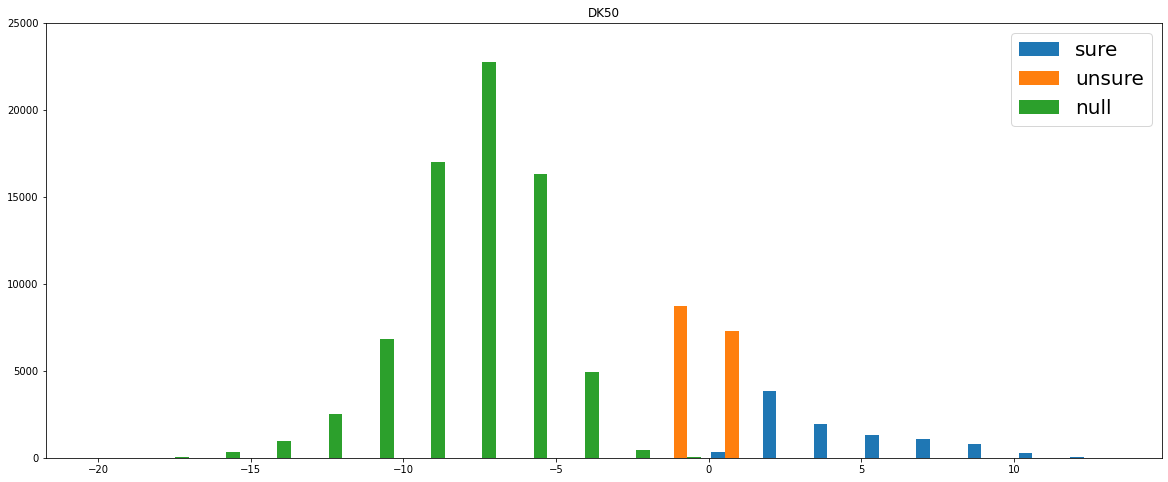

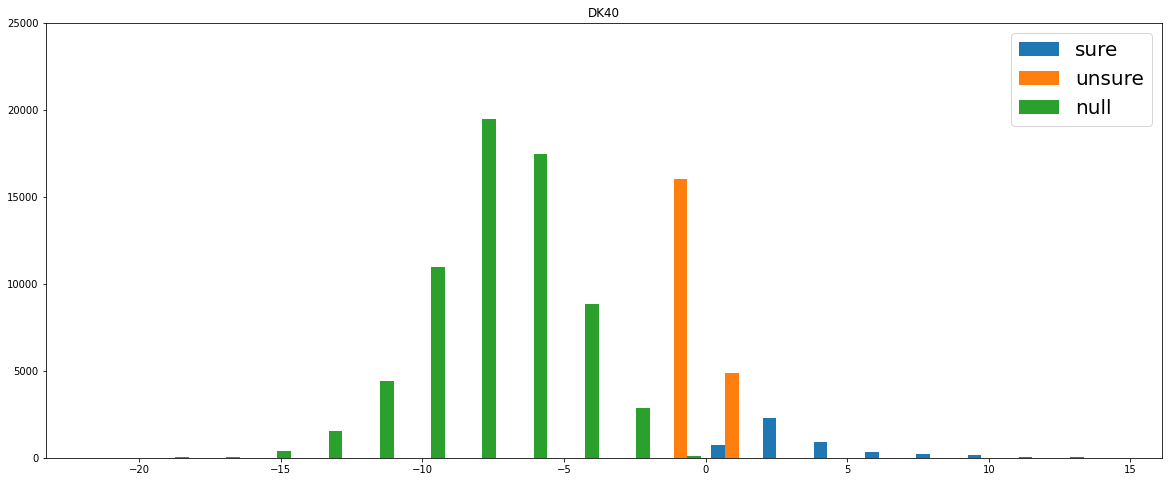

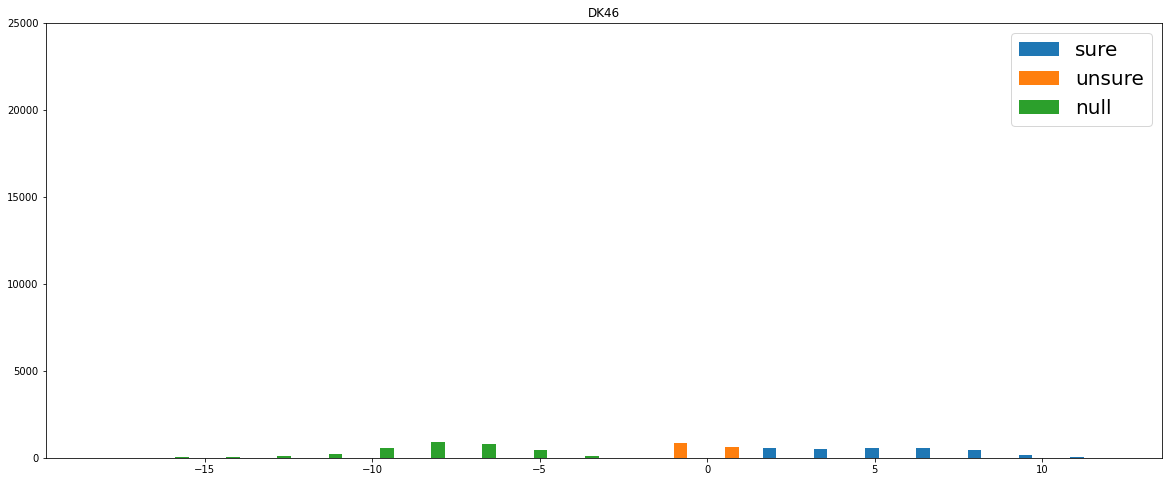

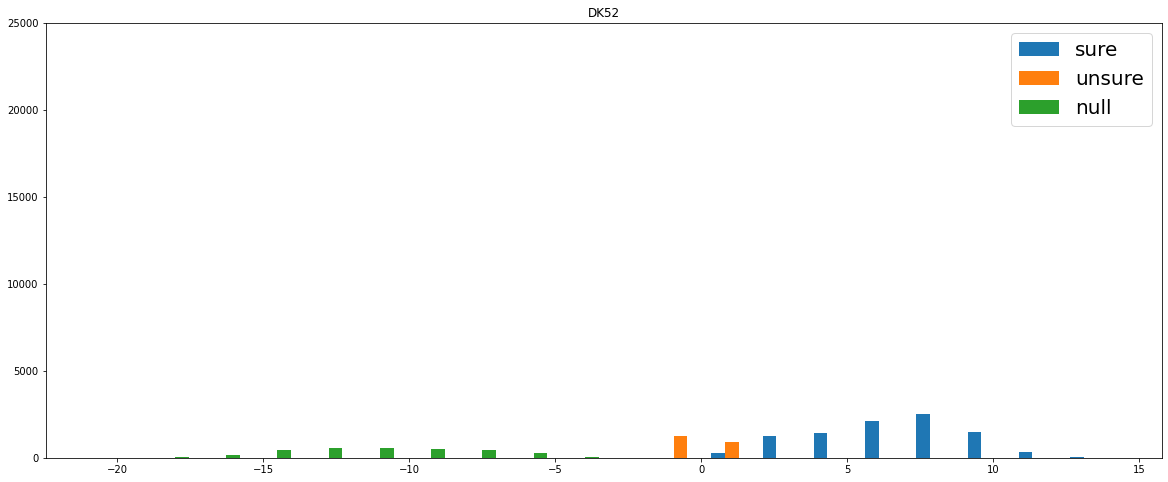

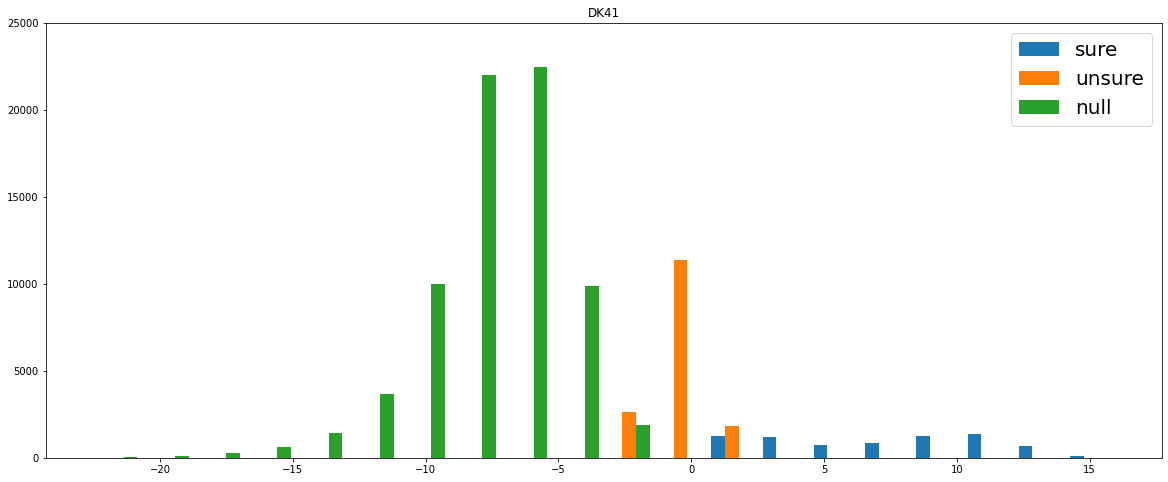

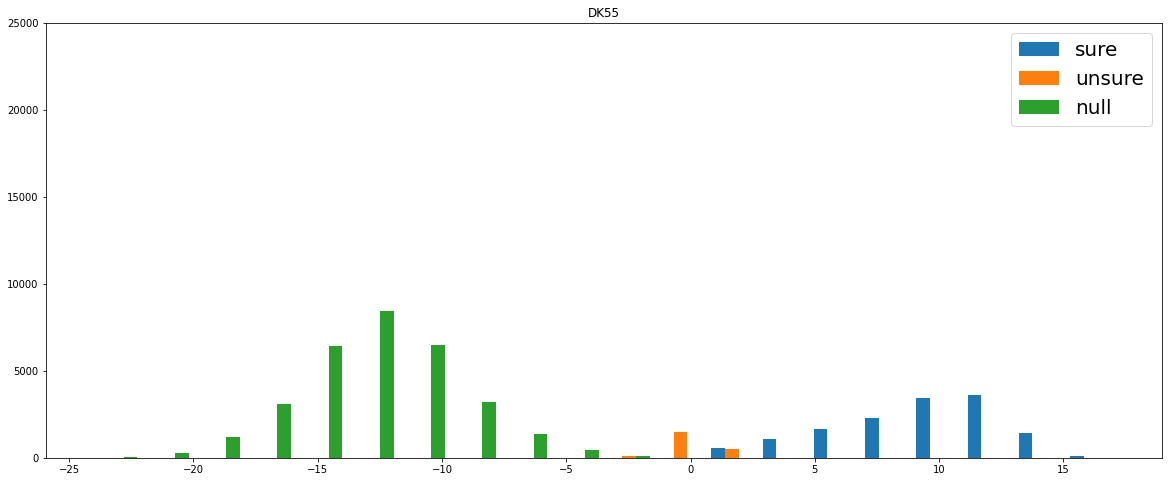

In [25]:
animals = ['DK50','DK40','DK46','DK52','DK41','DK55']
lower = 0
upper = 5
for animali in animals:
    detector = MultiThresholdDetector(animali,round = 2)
    detections = detector.load_detections()
    nulls = detections[[string_to_prediction(i) == -2 for i in detections.name]]
    sure = detections[[string_to_prediction(i) == 2 for i in detections.name]]
    unsure = detections[[string_to_prediction(i) == 0 for i in detections.name]]
    plt.figure(figsize = [20,8])
    plt.title(animali)
    plt.ylim([0,25000])
    plt.hist([sure['mean'],unsure['mean'],nulls['mean']],bins = 20);
    plt.legend(['sure','unsure','null'], prop={'size': 20})